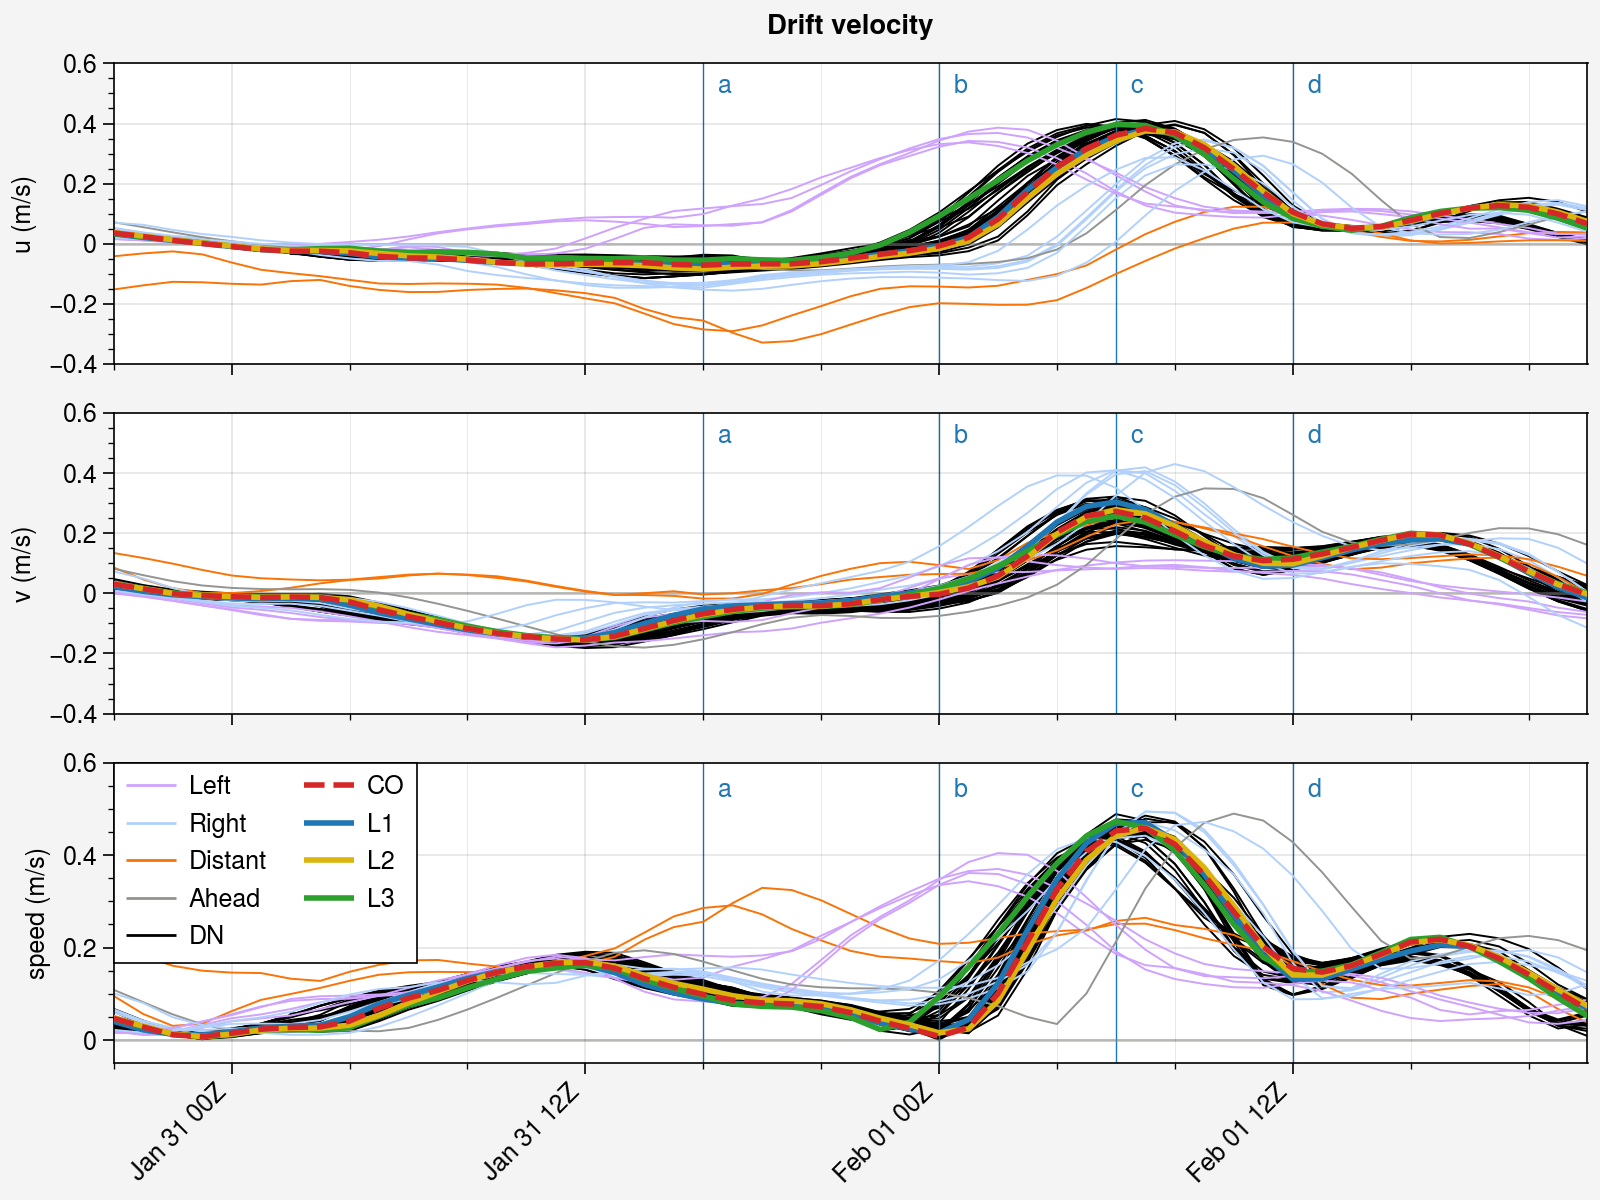

In [1]:
%run ../scripts/plot_velocity_time_series.py

In [13]:
# Another option for 
lines = {'a': '2020-01-31 17:00:00', # Distant group
         'b': '2020-02-01 01:00:00', # Left group
         'c': '2020-02-01 06:00:00', # L-sites and Right Group
         'd': '2020-02-01 10:00:00', # 2019P22 (Ahead)
    }

In [6]:
# Left, right, distant, l_sites, ahead
ahead = ['2019P22']

In [17]:
ts = slice('2020-01-31 00:00', '2020-02-02 00:00')
for buoy in ahead:
    print(buoy_data[buoy].loc[ts, 'speed'].idxmax())

2020-02-01 10:00:00


<AxesSubplot:xlabel='datetime'>

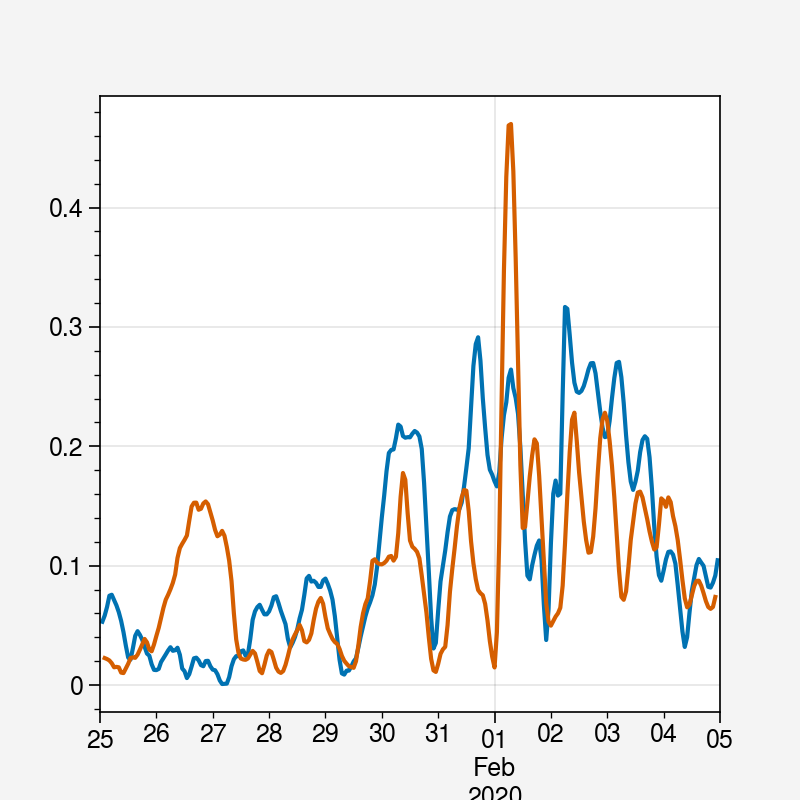

In [9]:
buoy_data[distant[0]].loc[:, 'speed'].plot()
buoy_data[l_sites[0]].loc[:, 'speed'].plot()